# Image Processing with Keras in Python

- Jan 2020
- Alexander Bakus
- MMAI 894 Deep Learning

## Ch. 1 Image Processing With Neural Networks
#### Introducing Convolutional Neural Networks
#### Images as Data: Visualizations

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Load the image
data = plt.imread('bricks.png')

# Display the image
plt.imshow(data)
plt.show()

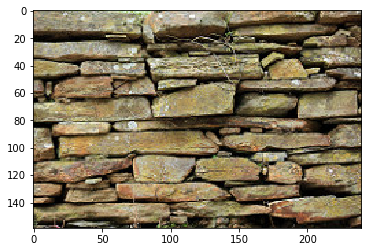

#### Images as data: changing images

In [ ]:
#Set the red channel in this part of the image to 1
data[:10,:10,0] = 1

# Set the green channel in this part of the image to 0
data[:10,:10,1] = 0

# Set the blue channel in this part of the image to 0
data[:10,:10,2] = 0

# Visualize the result
plt.imshow(data)
plt.show();

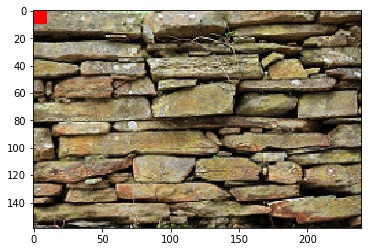

#### Classifying Images
#### Using one-hot encoding to represent images


In [ ]:
labels: ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']
    
# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

#### Evaluating a classifier

In [ ]:
# Calculate the number of correct predictions
number_correct = (predictions * test_labels).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct / len(test_labels)
print(proportion_correct)

    6.0

    0.75

#### Classification with Keras
#### Build a neural network

In [ ]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

#### Compile a neural network

In [ ]:
# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

#### Fitting a neural network model to clothing data

In [ ]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape(50, 784)

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

Train on 40 samples, validate on 10 samples
Epoch 1/3

32/40 [=======================>......] - ETA: 0s - loss: 1.0043 - acc: 0.5000
40/40 [==============================] - 0s 7ms/step - loss: 1.0082 - acc: 0.5000 - val_loss: 0.9938 - val_acc: 0.4000
Epoch 2/3

32/40 [=======================>......] - ETA: 0s - loss: 0.9627 - acc: 0.5625
40/40 [==============================] - 0s 153us/step - loss: 0.9490 - acc: 0.6000 - val_loss: 0.9631 - val_acc: 0.4000
Epoch 3/3

32/40 [=======================>......] - ETA: 0s - loss: 0.8892 - acc: 0.5938
40/40 [==============================] - 0s 141us/step - loss: 0.9047 - acc: 0.5750 - val_loss: 0.9241 - val_acc: 0.4000

#### Cross-validation for neural network evaluation

In [ ]:
# Reshape test data
test_data = test_data.reshape(10, 784)

# Evaluate the model
model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 130us/step

Out[1]: [0.9188934564590454, 0.6000000238418579]

## Ch. 2 Using Convolutions
#### Convolutions
#### One Dimensional convolutions

In [ ]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]

In [ ]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[2.68104586 2.95947725 2.84313735 ... 0.         0.         0.        ]

 [3.01830077 3.07058835 3.05098051 ... 0.         0.         0.        ]

[2.95163405 3.09934652 3.20261449 ... 0.         0.         0.        ]
 ...

[0.         0.         0.         ... 0.         0.         0.        ]

[0.         0.         0.         ... 0.         0.         0.        ]

[0.         0.         0.         ... 0.         0.         0.        ]]

#### Defining image convolution kernels

In [ ]:
# define a horizonal line in the image 

kernel = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1, -1]])

# Define a kernel that finds a light spot surrounded by dark pixels.

kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

# Define a kernel that finds a dark spot surrounded by bright pixels.

kernel = np.array([[1, 1, 1], 
                   [1, -1, 1],
                   [1, 1, 1]])

#### Implementing image convolutions in Keras
#### Convolutional network for image classification

In [ ]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

#### Training a CNN to classify clothing types

In [ ]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=.2, 
          epochs=3, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3

10/40 [======>.......................] - ETA: 0s - loss: 1.1084 - acc: 0.3000

40/40 [==============================] - 0s 6ms/step - loss: 0.9599 - acc: 0.4750 - val_loss: 0.6376 - val_acc: 0.9000

Epoch 2/3

10/40 [======>.......................] - ETA: 0s - loss: 0.7710 - acc: 0.9000

40/40 [==============================] - 0s 413us/step - loss: 0.6788 - acc: 0.8500 - val_loss: 0.4549 - val_acc: 1.0000

Epoch 3/3

10/40 [======>.......................] - ETA: 0s - loss: 0.5430 - acc: 1.0000

40/40 [==============================] - 0s 404us/step - loss: 0.4388 - acc: 0.9750 - val_loss: 0.3786 - val_acc: 1.0000

#### Evaluating a CNN with test data

In [ ]:
# Evaluate the model on separate test data
model.evaluate(test_data, test_labels, batch_size=10)

10/10 [==============================] - 0s 264us/step

Out[1]: [0.5546992421150208, 1.0]

#### Tweaking your convolutions
#### Add padding to a CNN

In [ ]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding = 'same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

#### Add strides to a convolutional network

In [ ]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides = 2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

#### Calculate the size of convolutional layer output

Zero padding and strides affect the size of the output of a convolution.

What is the size of the output for an input of size 256 by 256, with a kernel of size 4 by 4, padding of 1 and strides of 2?

#### Answer: 

    O = ((I − K + 2P)/S) + 1

        = (256 - 4 + 2(1))/2) + 1 

    O = 128

## Ch. 3 Going Deeper

#### Creating a deep learning network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, activation='relu', kernel_size = 2, input_shape=(img_rows, img_cols, 1)))


# Add another convolutional layer (5 units)
model.add(Conv2D(5, activation='relu', kernel_size=2))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

#### Train a deep CNN to classify clothing images

In [ ]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)

Train on 40 samples, validate on 10 samples

Epoch 1/3

10/40 [======>.......................] - ETA: 1s - loss: 1.0957 - acc: 0.4000

40/40 [==============================] - 0s 11ms/step - loss: 1.0872 - acc: 0.5250 - val_loss: 1.0646 - val_acc: 0.7000

Epoch 2/3


10/40 [======>.......................] - ETA: 0s - loss: 1.0688 - acc: 0.6000

40/40 [==============================] - 0s 744us/step - loss: 1.0414 - acc: 0.8000 - val_loss: 0.9942 - val_acc: 1.0000

Epoch 3/3


10/40 [======>.......................] - ETA: 0s - loss: 1.0067 - acc: 1.0000

40/40 [==============================] - 0s 735us/step - loss: 0.9606 - acc: 0.9750 - val_loss: 0.8857 - val_acc: 1.0000


10/10 [==============================] - 0s 283us/step

Out[1]: [0.9718376398086548, 0.8999999761581421]

### What is special about a deep network?
Networks with more convolution layers are called "deep" networks, and they may have more power to fit complex data, because of their ability to create hierarchical representations of the data that they fit.

What is a major difference between a deep CNN and a CNN with only one convolutional layer?

#### Answer: 
- A deep network requires more data and more computation to fit.

#### How many parameters?
### How many parameters in a CNN?

We need to know how many parameters a CNN has, so we can adjust the model architecture, to reduce this number or shift parameters from one part of the network to another. How many parameters would a network have if its inputs are images with 28-by-28 pixels, there is one convolutional layer with 10 units kernels of 3-by-3 pixels, using zero padding (input has the same size as the output), and one densely connected layer with 2 units?

#### Answer: 

    Conv2D = 9 * 10 + 10 = 100
    Flatten = 28*28*10 = 7840
    Dense = 7840 * 2 + 2 = 15682
    
    Total = 15682 + 100
    = 15,782

In [ ]:
# CNN model
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model 
model.summary()

In [ ]:
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_3 (Conv2D)            (None, 27, 27, 10)        50        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 10)        410       
_________________________________________________________________
flatten_2 (Flatten)          (None, 6760)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 20283     
=================================================================
Total params: 20,743
Trainable params: 20,743
Non-trainable params: 0
_________________________________________________________________

#### Pooling operations
#### Write your own pooling operations

In [ ]:
# Result placeholder
result = np.zeros((im.shape[0]//2, im.shape[1]//2))

# Pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])

#### Keras Pooling Layers

In [ ]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

In [ ]:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 5)         305       
_________________________________________________________________
flatten_1 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2163      
=================================================================
Total params: 2,543
Trainable params: 2,543
Non-trainable params: 0
_________________________________________________________________

#### Train a deep CNN with pooling to classify images

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit to training data
model.fit(train_data, train_labels, epochs=3, batch_size=10, validation_split=.2)

# Evaluate on test data 
model.evaluate(test_data, test_labels, batch_size=10)

In [ ]:
Train on 40 samples, validate on 10 samples
Epoch 1/3

10/40 [======>.......................] - ETA: 0s - loss: 1.0914 - acc: 0.7000
40/40 [==============================] - 0s 8ms/step - loss: 1.0744 - acc: 0.7000 - val_loss: 1.0685 - val_acc: 0.8000
Epoch 2/3

10/40 [======>.......................] - ETA: 0s - loss: 1.0674 - acc: 0.7000
40/40 [==============================] - 0s 1ms/step - loss: 1.0524 - acc: 0.8250 - val_loss: 1.0376 - val_acc: 0.9000
Epoch 3/3

10/40 [======>.......................] - ETA: 0s - loss: 1.0324 - acc: 1.0000
40/40 [==============================] - 0s 649us/step - loss: 1.0184 - acc: 0.9250 - val_loss: 0.9932 - val_acc: 0.9000

10/10 [==============================] - 0s 186us/step
Out[1]: [1.0336188077926636, 0.699999988079071]

## Ch. 4 Understanding and Improving Deep Convolutional Networks
#### Tracking learning
#### Plot the learning curves

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model.fit(train_data, train_labels, validation_split=.2, epochs=3, batch_size=10)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

In [ ]:
Train on 40 samples, validate on 10 samples
Epoch 1/3

10/40 [======>.......................] - ETA: 0s - loss: 0.2774 - acc: 1.0000
40/40 [==============================] - 0s 452us/step - loss: 0.3107 - acc: 0.9750 - val_loss: 0.2975 - val_acc: 1.0000
Epoch 2/3

10/40 [======>.......................] - ETA: 0s - loss: 0.3838 - acc: 0.9000
40/40 [==============================] - 0s 445us/step - loss: 0.2588 - acc: 0.9750 - val_loss: 0.2666 - val_acc: 1.0000
Epoch 3/3

10/40 [======>.......................] - ETA: 0s - loss: 0.3524 - acc: 0.9000
40/40 [==============================] - 0s 442us/step - loss: 0.2192 - acc: 0.9750 - val_loss: 0.2309 - val_acc: 1.0000

#### Using stored weights to predict in a test set

In [ ]:
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model.predict(test_data[:3]) 

In [ ]:
array([[0.09926841, 0.09344567, 0.8072859 ],
       [0.03939046, 0.043042  , 0.91756755],
       [0.23671193, 0.70986897, 0.05341912]], dtype=float32)

#### Regularization
#### Adding dropout to your network

In [ ]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a dropout layer
model.add(Dropout(.2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

#### Add batch normalization to your network

In [ ]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))


# Add batch normalization layer
model.add(BatchNormalization())

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

#### Interpreting the model
#### Extracting a kernel from a trained network

In [ ]:
# Load the weights into the model
model.load_weights('weights.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][...,0, 0]
print(kernel)

[[ 0.03504268  0.4328133 ]

 [-0.17416623  0.4680562 ]]

### Shape of the weights
A Keras neural network stores its layers in a list called model.layers. For the convolutional layers, you can get the weights using the .get_weights() method. This returns a list, and the first item in this list is an array representing the weights of the convolutional kernels. If the shape of this array is (2, 2, 1, 5), what does the first number (2) represent?

#### Answer:
- The kernel size is 2 by 2.

#### Visualizing kernel responses

In [ ]:
import matplotlib.pyplot as plt

# Convolve with the fourth image in test_data
out = convolution(test_data[3, :, :, 0], kernel)

# Visualize the result
plt.imshow(out)
plt.show()

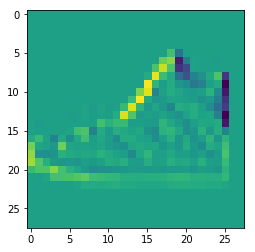

#### Next steps